In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pickle

In [3]:
df = pd.read_csv("data/heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
df["Blood Pressure"].str.split('/')

0        [158, 88]
1        [165, 93]
2        [174, 99]
3       [163, 100]
4         [91, 88]
           ...    
8758      [94, 76]
8759    [157, 102]
8760     [161, 75]
8761     [119, 67]
8762     [138, 67]
Name: Blood Pressure, Length: 8763, dtype: object

In [7]:
df["Blood Pressure"] = df["Blood Pressure"].str.split('/')

In [8]:
df["diastolic"] = df["Blood Pressure"].apply(lambda x : x[1])

In [9]:
df["systolic"] = df["Blood Pressure"].apply(lambda x : x[0])

In [10]:
df = df.drop(["Blood Pressure", "Patient ID", "Hemisphere", "Alcohol Consumption", "Income", "Continent", "Country", "Physical Activity Days Per Week", "Previous Heart Problems", "Family History", "Diet", "Age", "Heart Rate", "Smoking", "Sex", "Medication Use", "Sedentary Hours Per Day", "diastolic"] , axis = 1)

In [12]:
#df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "Male" else 1)

In [34]:
#df["Diet"].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [35]:
#df["Diet"] = df["Diet"].map({"Healthy": 0, "Average": 1, "Unhealthy": 2})

In [11]:
df.iloc[:,-6:] = df.iloc[:,-6:].astype(int)

In [12]:
df

,Cholesterol,Diabetes,Obesity,Exercise Hours Per Week,Stress Level,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,systolic
0,208,0,0,4.168189,9,31.0,286,6,0,158
1,389,1,1,1.813242,1,27.0,235,7,0,165
2,324,1,0,2.078353,9,28.0,587,4,0,174
3,383,1,0,9.828130,9,36.0,378,4,0,163
4,318,1,1,5.804299,6,21.0,231,5,0,91
...,...,...,...,...,...,...,...,...,...,...
8758,121,1,0,7.917342,8,19.0,67,7,0,94
8759,120,1,1,16.558426,8,23.0,617,9,0,157
8760,250,0,1,3.148438,5,35.0,527,4,1,161
8761,178,1,0,3.789950,5,27.0,114,8,0,119


In [13]:
print(df.dtypes)

Cholesterol                  int64
Diabetes                     int64
Obesity                      int64
Exercise Hours Per Week    float64
Stress Level                 int64
BMI                        float64
Triglycerides                int64
Sleep Hours Per Day          int64
Heart Attack Risk            int64
systolic                    object
dtype: object


In [14]:
#df["diastolic"] = df["diastolic"].astype(int)
df["systolic"] = df["systolic"].astype(int)

In [15]:
df.isnull().sum()

Cholesterol                0
Diabetes                   0
Obesity                    0
Exercise Hours Per Week    0
Stress Level               0
BMI                        0
Triglycerides              0
Sleep Hours Per Day        0
Heart Attack Risk          0
systolic                   0
dtype: int64

In [16]:
len(df.columns)

10

In [17]:
X = df.drop("Heart Attack Risk", axis = 1)

In [18]:
y = df["Heart Attack Risk"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7010, 9)
X_test shape: (1753, 9)
y_train shape: (7010,)
y_test shape: (1753,)


In [21]:
from sklearn.feature_selection import SelectKBest

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X_train, y_train)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': X_train.columns, 'score': sel.scores_}).sort_values('score', ascending=False)

(8763, 9)
(7010, 5)
[3.54101456 1.88894965 3.0944907  1.50730173 1.12959053 1.15018547
 1.50826606 1.89792483 2.23885553]


,column,score
0,Cholesterol,3.541015
2,Obesity,3.094491
8,systolic,2.238856
7,Sleep Hours Per Day,1.897925
1,Diabetes,1.888950
6,Triglycerides,1.508266
3,Exercise Hours Per Week,1.507302
5,BMI,1.150185
4,Stress Level,1.129591


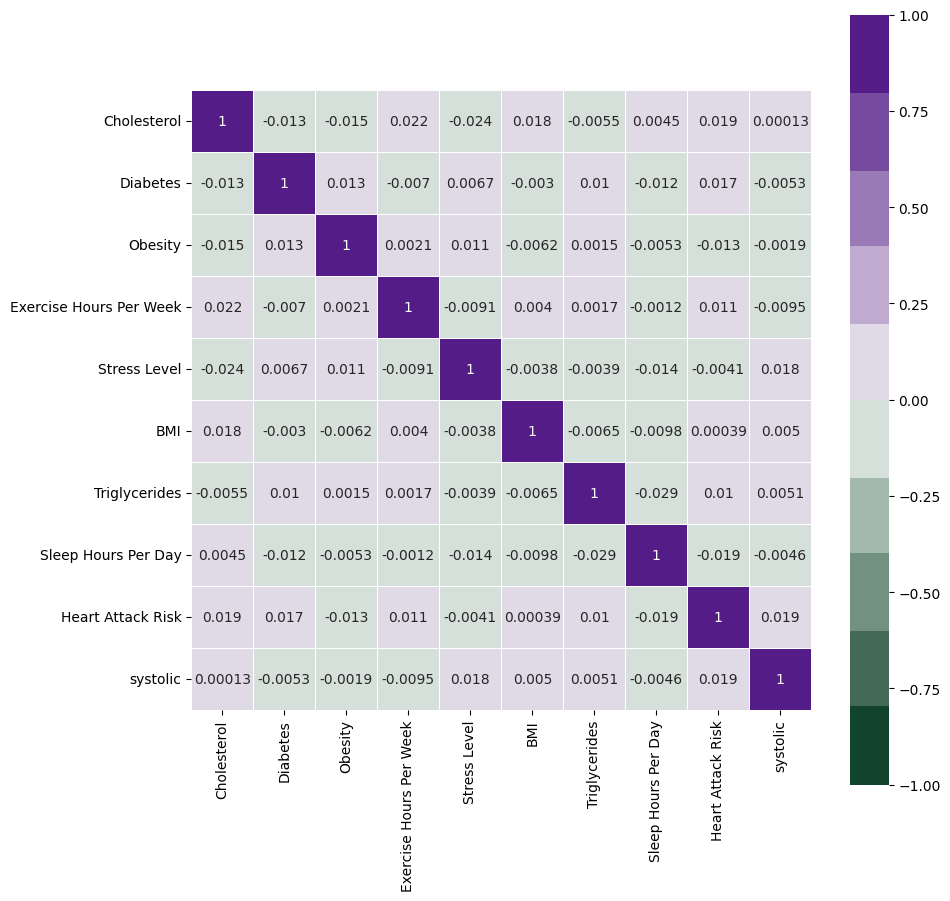

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [ ]:
# Voy a aplicar PCA para ver si puedo reducir el número de variables manteniendo la mayor parte de la información.
# PCA requiere primero estandarizar los datos para asegurarme que ninguna característica se califica como más importante debido a diferencias de escala.


In [23]:
scaler = StandardScaler()
X_train_sc = scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
df_scaled = scaler.fit_transform(df)

In [24]:
pca = PCA()
converted_data = pca.fit_transform(df_scaled)
converted_data.shape

(8763, 10)

In [25]:
pca.explained_variance_ratio_

array([0.10634623, 0.10531272, 0.10197087, 0.10042111, 0.09981715,
       0.09964073, 0.09830512, 0.09683983, 0.09613004, 0.0952162 ])

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10634623, 0.21165895, 0.31362982, 0.41405093, 0.51386808,
       0.61350881, 0.71181393, 0.80865376, 0.9047838 , 1.        ])

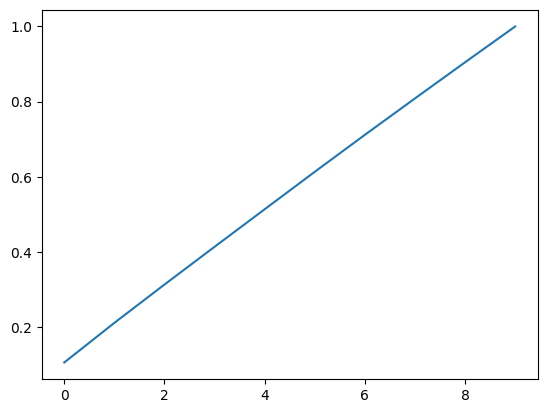

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# Se puede observar que con 1 componente principal tenemos el 20% de la información y para explicar el 90% de la varianza, o lo que es lo mismo, 
# para tener el 90% de la información, es necesario hacer uso de todas los componentes principales(las 23 características). 
# Por lo que podemos concluir que todas tienen suficiente relevancia para el modelo y no podemos prescindir de ninguna de ellas

In [ ]:
# Balanceado de clases:

In [28]:
y.value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

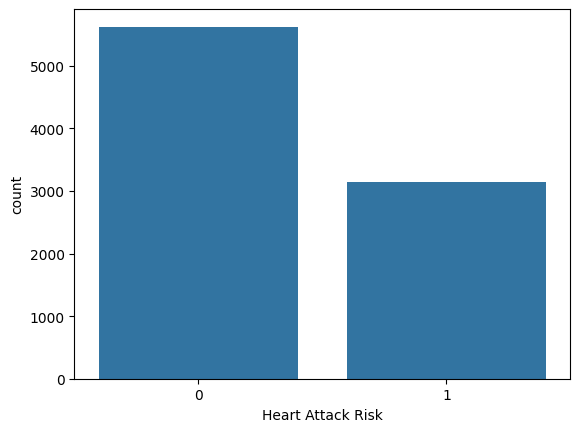

In [29]:
sns.countplot(x="Heart Attack Risk", data=df)

In [ ]:
# Tenemos el doble de casos de ataque al corazón que de casos que no ha habido ataque, por lo que balanceo las clases con un oversampling para aumentar las muestras de la clase minoritaria

In [30]:
smo = SMOTE(sampling_strategy="auto", random_state = 42)
X_new, y_new = smo.fit_resample(X_train, y_train)

In [31]:
print("X_new shape:", X_new.shape)
print("y_new shape:", y_new.shape)

X_new shape: (8998, 9)
y_new shape: (8998,)


In [32]:
y_new.value_counts()

Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64

In [ ]:
# Uso un GridSearch para encontrar los parámetros óptimos de este algoritmo

In [ ]:
# Con el DecissionTreeClassifier

In [33]:
parameters_tree = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [None, 3, 5],
    "min_samples_leaf" : [2, 3, 5]
}

tree = DecisionTreeClassifier()
tree_clf = GridSearchCV(estimator = tree,
                  param_grid = parameters_tree,
                  n_jobs = -1,
                  cv = 5)
tree_clf.fit(X_new, y_new)
tree_clf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}

In [34]:
tree_clf.score(X_test,y_test)

0.5139760410724472

In [35]:
y_pred_tree = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
f1_tree

0.3896848137535817

In [36]:
recall_score(y_test, y_pred_tree)

0.43312101910828027

<Axes: >

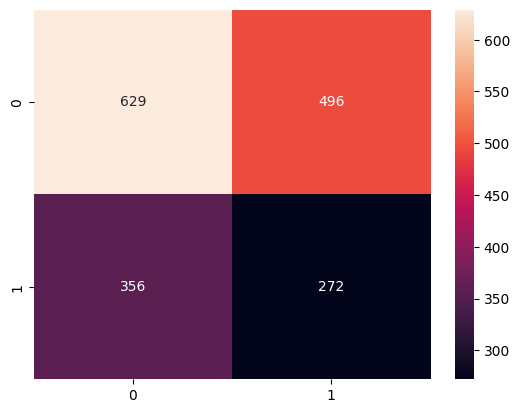

In [37]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt = 'd')

In [ ]:
# Con el RandomForestClassifier

In [38]:
parameters_rfc = {
    "n_estimators" : [10, 100],
    "max_depth" : [None, 3],
    "max_features": [1,2,3],
    "min_samples_leaf" : [2, 3]
}

rfc = RandomForestClassifier()
rf_clf = GridSearchCV(estimator = rfc,
                  param_grid = parameters_rfc,
                  n_jobs = -1,
                  cv = 5)
rf_clf.fit(X_new, y_new)
rf_clf.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [41]:
rf_clf.score(X_test,y_test)

0.5436394751853965

In [42]:
y_pred_rfc = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
f1_rfc

0.33884297520661155

In [43]:
recall_score(y_test, y_pred_rfc)

0.32643312101910826

<Axes: >

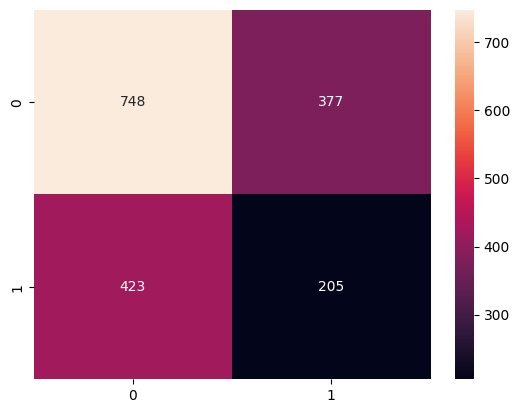

In [44]:
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt = 'd')

In [45]:
parameters_xgb = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3,5,7]
}

xgb = xgboost.XGBClassifier()
xgb_clf = GridSearchCV(estimator = xgb,
                  param_grid = parameters_xgb,
                  n_jobs = -1,
                  cv = 5)
xgb_clf.fit(X_new, y_new)
xgb_clf.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [46]:
xgb_clf.score(X_test,y_test)

0.5521962350256703

In [47]:
y_pred_xgb = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
f1_xgb

0.33866891322662174

In [48]:
recall_score(y_test, y_pred_xgb)

0.3200636942675159

<Axes: >

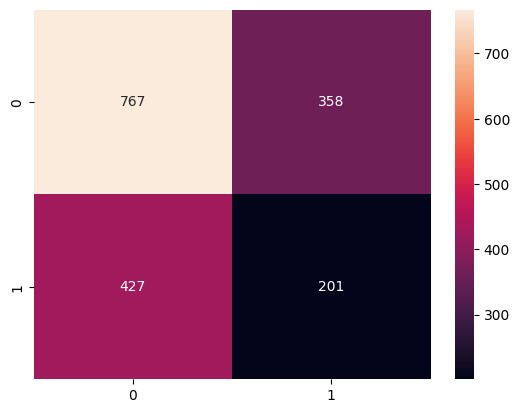

In [49]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt = 'd')

In [50]:
parameters_lr = {
    "penalty": ['l1', 'l2'],
    "C": np.logspace(0, 4, 10)
}

lr = LogisticRegression()
reg_log = GridSearchCV(estimator = lr,
                  param_grid = parameters_lr,
                  n_jobs = -1,
                  cv = 5)
reg_log.fit(X_new, y_new)
reg_log.best_params_

c:\miniconda\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\miniconda\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\miniconda\envs\machine_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\miniconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_sol

{'C': 166.81005372000593, 'penalty': 'l2'}

In [51]:
reg_log.score(X_test,y_test)

0.5025670279520822

In [52]:
y_pred_lr = reg_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
f1_lr

0.38418079096045193

In [53]:
recall_score(y_test, y_pred_lr)

0.43312101910828027

<Axes: >

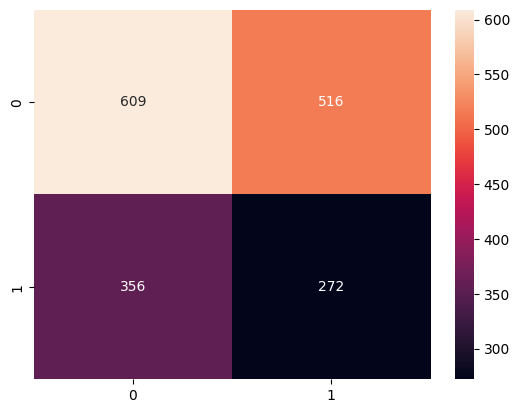

In [54]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt = 'd')

In [55]:
svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])

parameters_svm = {
    'selectkbest__k': [2, 4],
    'svm__C': [0.1, 10, 100],
    'svm__degree': [2, 4],
    'svm__gamma': ['scale', 'auto']
}

gs_svm = GridSearchCV(svm,
                         parameters_svm,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 0,
                         n_jobs = -1)

gs_svm.fit(X_new, y_new)
gs_svm.best_params_

{'selectkbest__k': 4, 'svm__C': 100, 'svm__degree': 2, 'svm__gamma': 'scale'}

In [56]:
gs_svm.score(X_test,y_test)

0.5367940673131774

In [57]:
y_pred_svm = gs_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
f1_svm

0.34090909090909094

In [58]:
recall_score(y_test, y_pred_svm)

0.3343949044585987

<Axes: >

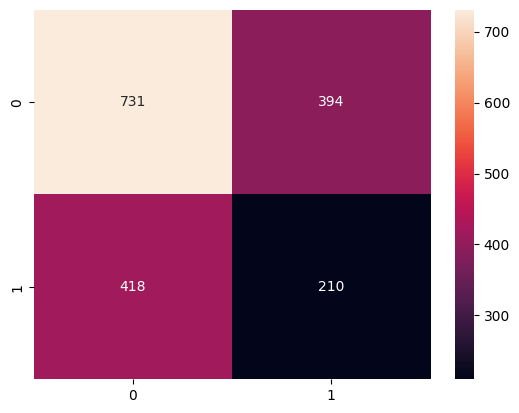

In [59]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt = 'd')

In [60]:
parameters_knn = {
    "n_neighbors": [1, 3, 5, 7],
    "weights" : ['uniform', 'distance'],
    "leaf_size" : [1, 15, 30, 45]
}

knn = KNeighborsClassifier()
knn_clf = GridSearchCV(estimator = knn,
                  param_grid = parameters_knn,
                  n_jobs = -1,
                  cv = 5)
knn_clf.fit(X_new, y_new)
knn_clf.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}

In [61]:
knn_clf.score(X_test,y_test)

0.5373645179691957

In [62]:
y_pred_knn = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
f1_knn

0.37949502677888297

In [63]:
recall_score(y_test, y_pred_knn)

0.39490445859872614

<Axes: >

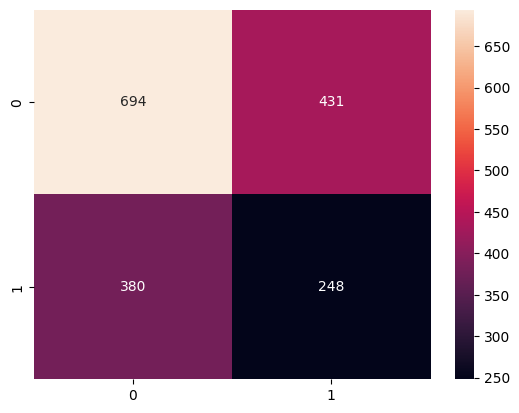

In [64]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt = 'd')

In [65]:
def dict_vals(dict):
    x = list(dict.values())
    x = np.array([x])
    return x

In [82]:
def hacer_prediccion(predict_type, diccionario):
    lifestyle_changes = []
    if predict_type > 0:
        if 'Cholesterol' in diccionario and diccionario['Cholesterol'] == 1:
            lifestyle_changes.append('tienes que dejar de fumar')
        if 'BMI' in diccionario and diccionario['BMI'] < 18.5:
            lifestyle_changes.append('tienes que ganar peso')
        elif 'BMI' in diccionario and diccionario['BMI'] > 25:
            lifestyle_changes.append('tienes que perder peso')
        if 'Exercise Hours Per Week' in diccionario and diccionario['Exercise Hours Per Week'] < 1.25:
            lifestyle_changes.append('tienes que hacer más ejercicio')
        if 'systolic' in diccionario and diccionario['systolic'] > 120:
            lifestyle_changes.append('tienes que controlar tu presión arterial')
        if 'Stresss Level' in diccionario and diccionario['Stresss Level'] > 5:
            lifestyle_changes.append('tienes que aprender a relajarte')
        if 'Obesity' in diccionario and diccionario['Obesity'] == 1:
            lifestyle_changes.append('tienes que comer mejor')  
        if 'Sleep Hours Per Day' in diccionario and diccionario['Sleep Hours Per Day'] < 7:
            lifestyle_changes.append('tienes que dormir más')  
        if 'Triglycerides' in diccionario and diccionario['Triglycerides'] > 150:
            lifestyle_changes.append('tienes que controlar tus trigliceridos')  
        if 'Diabetes' in diccionario and diccionario['Diabetes'] == 1:
            lifestyle_changes.append('tienes que controlar tu diabetes')  
        print("Heart attack risk:", predict_type)
        for i in lifestyle_changes:
            print(f"Por favor, {i},")
        print("Esto puede reducir tu riesgo de ataque al corazón.")
        
    if predict_type > 0.75:
        print("Deberías consultar con tu médico.")
        print("Riesgo de ataque al corazón:", predict_type)

In [83]:
nuevo_paciente = {'Cholesterol': 423, 'systolic': 126,
       'Diabetes': 1, 'Obesity': 0, 'Exercise Hours Per Week': 5.07,
        'BMI': 42.17, 'Triglycerides': 587, "Stresss Level": 8, 'Sleep Hours Per Day' : 6}
dict1 = pd.DataFrame([nuevo_paciente])
x = dict_vals(nuevo_paciente)

In [84]:
predict_type = reg_log.predict_proba(x)[:, 1]
resultado = hacer_prediccion(predict_type, nuevo_paciente)
resultado

Heart attack risk: [4.42684297e-20]
Por favor, tienes que perder peso,
Por favor, tienes que controlar tu presión arterial,
Por favor, tienes que aprender a relajarte,
Por favor, tienes que dormir más,
Por favor, tienes que controlar tus trigliceridos,
Por favor, tienes que controlar tu diabetes,
Esto puede reducir tu riesgo de ataque al corazón.


c:\miniconda\envs\machine_learning\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [85]:
modelo_entrenado = reg_log

In [86]:
with open('modelo_entrenado.pkl', 'wb') as archivo_modelo:
    pickle.dump(modelo_entrenado, archivo_modelo)